In [3]:
import numpy as np
from scipy.stats import poisson, norm, t, chisquare, f
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pickle
import pandas as pd

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [6]:
observed_hurricanes_2005 = 15
historic_average = 6.3

#Poisson probability for observing 15 or more hurricanes
probability_15_or_more = 1 - poisson.cdf(observed_hurricanes_2005 - 1, historic_average)

#Standard deviation of the Poisson distribution
poisson_std_dev = np.sqrt(historic_average)

#Z-score
z_score = (observed_hurricanes_2005 - historic_average) / poisson_std_dev

#Probability of having a Z-score of 2 or larger (one-tailed test)
probability_z_2_or_larger = 1 - norm.cdf(2)

is_significant = z_score > 2

print(f"Probability of observing 15 or more hurricanes: {probability_15_or_more:.4f}")
print(f"Z-score: {z_score:.4f}")
print(f"Probability of having a Z-score of 2 or larger: {probability_z_2_or_larger:.4f}")
print(f"Is the number of hurricanes in 2005 significantly larger? {'Yes' if is_significant else 'No'}")


Probability of observing 15 or more hurricanes: 0.0022
Z-score: 3.4662
Probability of having a Z-score of 2 or larger: 0.0228
Is the number of hurricanes in 2005 significantly larger? Yes


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [8]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

#Means and standard deviations
mean_pre = np.mean(pre)
mean_post = np.mean(post)
std_dev_pre = np.std(pre, ddof=1)  # ddof=1 for sample standard deviation
std_dev_post = np.std(post, ddof=1)

#Pooled standard deviation (sigma)
pooled_std_dev = np.sqrt((std_dev_pre**2 + std_dev_post**2) / 2)

#t-statistic
n = len(pre)
t_statistic = (mean_pre - mean_post) / (pooled_std_dev * np.sqrt(2/n))

degrees_of_freedom = 2 * n - 2

p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

print("T-Statistic:", t_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("The change in blood pressures is statistically significant.")
else:
    print("There is no statistically significant change in blood pressures.")


T-Statistic: -3.786997938137629
Degrees of Freedom: 18
P-Value: 0.001349941831327639
The change in blood pressures is statistically significant.


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

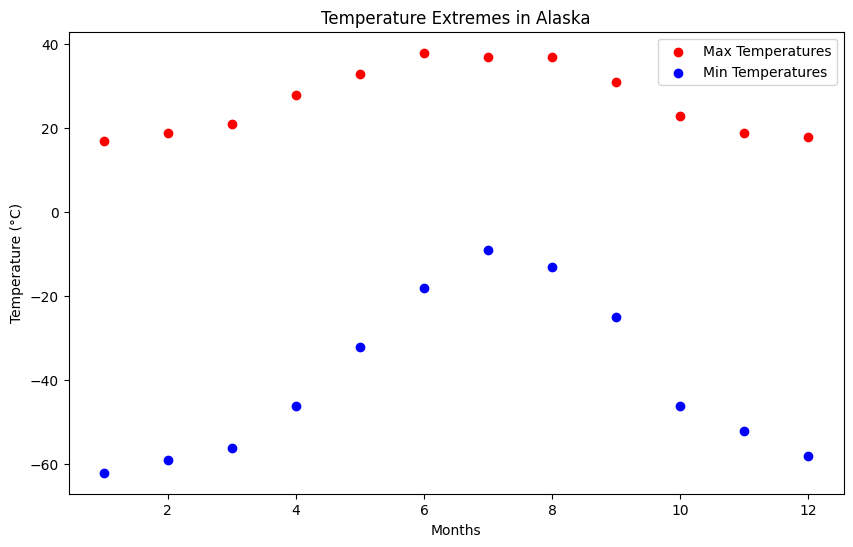

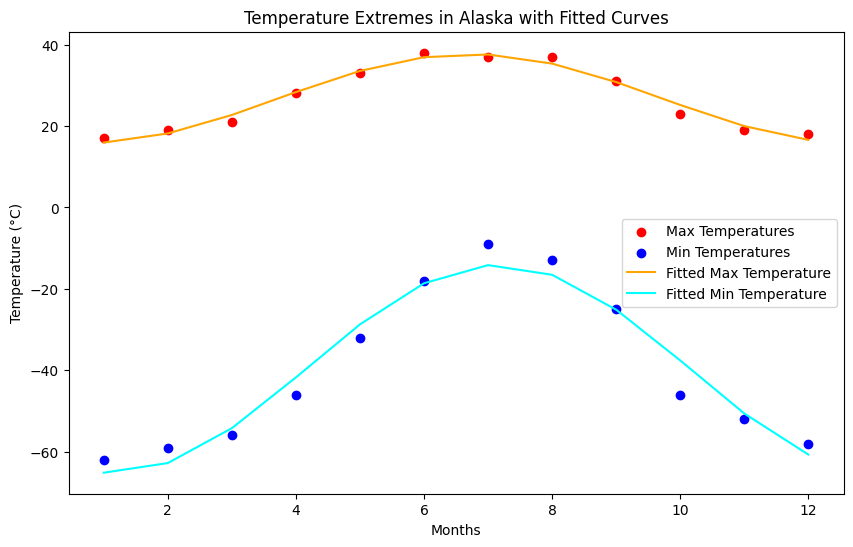

Time offset difference between max and min temperatures: 12.4326


In [11]:
months = np.arange(1, 13)
max_temps = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temps = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])


plt.figure(figsize=(10, 6))
plt.scatter(months, max_temps, label='Max Temperatures', color='red')
plt.scatter(months, min_temps, label='Min Temperatures', color='blue')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Extremes in Alaska')
plt.legend()
plt.show()


def temperature_function(month, amplitude, phase, offset):
    return amplitude * np.sin(2 * np.pi * (month + phase) / 12) + offset

#Fit the function to the data
popt_max, pcov_max = curve_fit(temperature_function, months, max_temps)
popt_min, pcov_min = curve_fit(temperature_function, months, min_temps)

#Fitted curves
fit_max = temperature_function(months, *popt_max)
fit_min = temperature_function(months, *popt_min)

plt.figure(figsize=(10, 6))
plt.scatter(months, max_temps, label='Max Temperatures', color='red')
plt.scatter(months, min_temps, label='Min Temperatures', color='blue')
plt.plot(months, fit_max, label='Fitted Max Temperature', color='orange')
plt.plot(months, fit_min, label='Fitted Min Temperature', color='cyan')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Extremes in Alaska with Fitted Curves')
plt.legend()
plt.show()

offset_difference = popt_max[1] - popt_min[1]
print(f"Time offset difference between max and min temperatures: {offset_difference:.4f}")


#The fit is reasonable because the fitted curves capture the general trend of the data

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

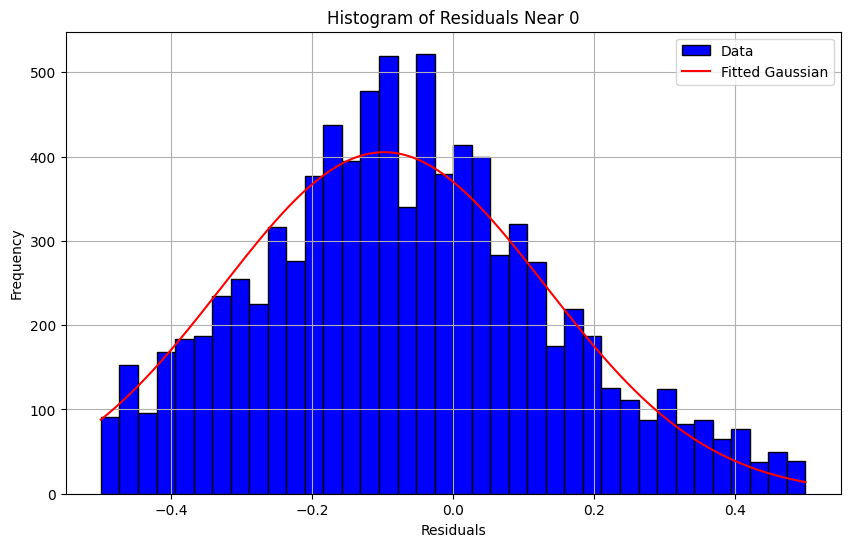

Chi-square value near 0: 307.9722
P-value of the fit near 0: 0.0000
The fit function near 0 is not appropriate to describe the data.


In [53]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

file_path = "data/residuals_261.pkl"
with open(file_path, mode='rb') as file:
    dict = pickle.load(file).tolist()
    df = pd.DataFrame(dict)

residuals = df['residuals'].values

residuals_near_zero = residuals[(residuals >= -0.5) & (residuals <= 0.5)]

plt.figure(figsize=(10, 6))
plt.hist(residuals_near_zero, bins='auto', color='blue', edgecolor='black', label='Data')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals Near 0')

#Poisson uncertainties for each bin
hist_near_zero, bin_edges_near_zero = np.histogram(residuals_near_zero, bins='auto')
errors_near_zero = np.sqrt(hist_near_zero)


def gaussian(x, amp, mean, sigma):
    return amp * np.exp(-0.5 * ((x - mean) / sigma)**2)

try:
    popt_near_zero, pcov_near_zero = curve_fit(gaussian, bin_edges_near_zero[:-1], hist_near_zero, sigma=errors_near_zero, absolute_sigma=True, bounds=([0, -np.inf, 0], np.inf), maxfev=10000)
except RuntimeError:
    print("Optimal parameters not found. Try increasing maxfev or check your data.")


x_fit = np.linspace(bin_edges_near_zero[0], bin_edges_near_zero[-1], 1000)

plt.plot(x_fit, gaussian(x_fit, *popt_near_zero), color='red', label='Fitted Gaussian')

plt.legend()
plt.grid(True)
plt.show()

#Chi-square goodness-of-fit test
observed_near_zero = hist_near_zero
expected_near_zero = gaussian(bin_edges_near_zero[:-1], *popt_near_zero)
expected_near_zero_normalized = expected_near_zero * np.sum(observed_near_zero) / np.sum(expected_near_zero)

chi2_near_zero, p_value_near_zero = chisquare(observed_near_zero, f_exp=expected_near_zero_normalized, ddof=len(popt_near_zero))

print(f"Chi-square value near 0: {chi2_near_zero:.4f}")
print(f"P-value of the fit near 0: {p_value_near_zero:.4f}")

# Determine if the fit is appropriate based on the p-value
if p_value_near_zero < 0.05:
    print("The fit function near 0 is not appropriate to describe the data.")
else:
    print("The fit function near 0 is appropriate to describe the data.")


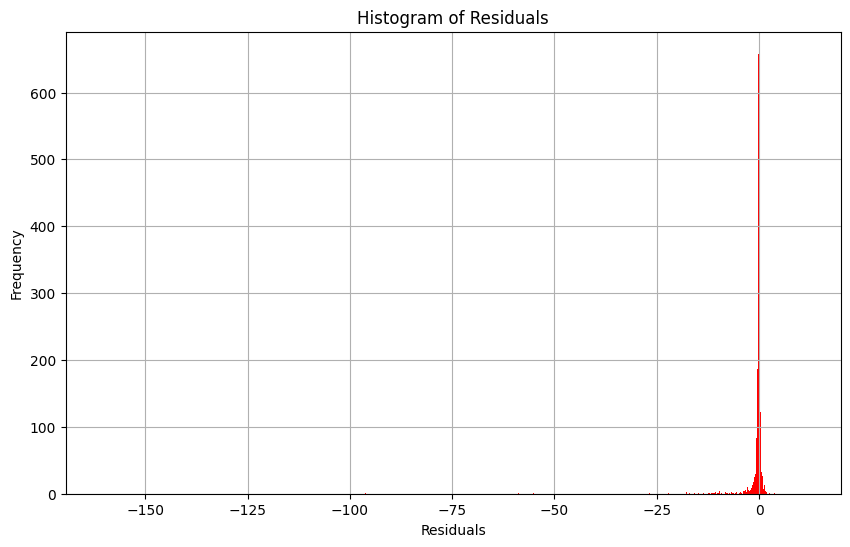

In [42]:
residuals = df['residuals'].values

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins='auto', color='red')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

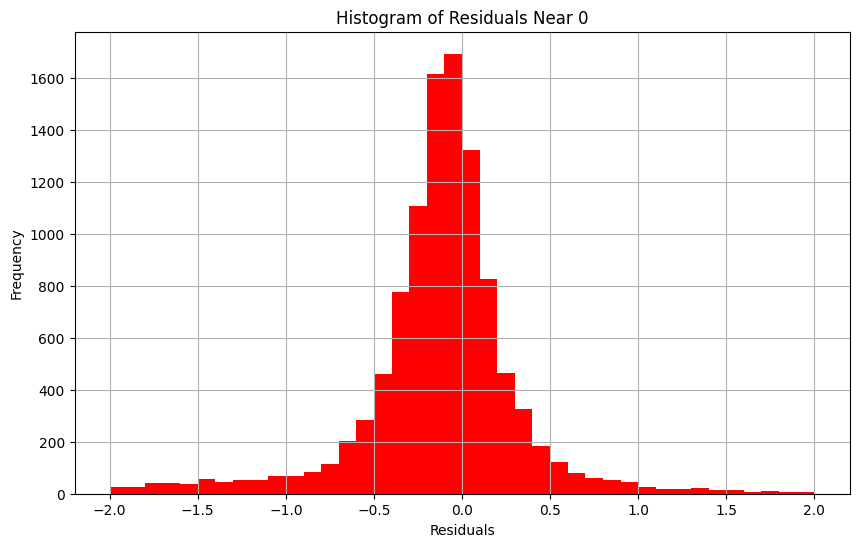

In [44]:
residuals = df['residuals'].values

bin_range = np.arange(-2, 2.1, 0.1)

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=bin_range, color='red')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals Near 0')
plt.grid(True)
plt.show()

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

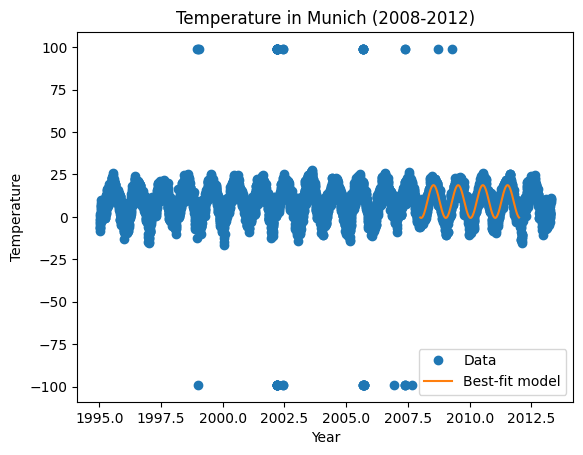

Best-fit values:
 a = -9.65937596723202, b = -0.22384112404638387, c = 9.058526161893395
Parameter uncertainties:
 a_err = 0.17639108903197087, b_err = 0.01830918545124926, c_err = 0.12489600291950578
Overall average temperature: 8.957883253417267
Typical daily average values:
 Coldest time: -0.5649525698574518
 Hottest time: 9.004788756591568


In [2]:
filename = "data/munich_temperatures_average_with_bad_data.txt"
data = np.loadtxt(filename, skiprows=7, dtype=None, encoding='utf-8')

years = data[:, 0]
temperatures = data[:, 1]


def model(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c


popt, pcov = curve_fit(model, years, temperatures, bounds=([-np.inf, -2 * np.pi, -np.inf], [np.inf, 2 * np.pi, np.inf]))

#Best-fit parameters and their uncertainties
a_fit, b_fit, c_fit = popt
a_err, b_err, c_err = np.sqrt(np.diag(pcov))

t_range = np.linspace(2008, 2012, 1000)


plt.plot(years, temperatures, 'o', label='Data')
plt.plot(t_range, model(t_range, a_fit, b_fit, c_fit), label='Best-fit model')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature in Munich (2008-2012)')
plt.legend()
plt.show()

average_temperature = np.mean(temperatures)

coldest_time_prediction = model(np.min(years), a_fit, b_fit, c_fit)
hottest_time_prediction = model(np.max(years), a_fit, b_fit, c_fit)

print(f"Best-fit values:\n a = {a_fit}, b = {b_fit}, c = {c_fit}")
print(f"Parameter uncertainties:\n a_err = {a_err}, b_err = {b_err}, c_err = {c_err}")
print(f"Overall average temperature: {average_temperature}")
print(f"Typical daily average values:\n Coldest time: {coldest_time_prediction}\n Hottest time: {hottest_time_prediction}")

#The b parameter in the cosine function represents the phase shift or the initial phase of the oscillation.
#In the context of this temperature model, it indicates the starting point of the cosine wave, which can be related to the time of the year when temperatures are at their minimum


In [38]:
#optional part

filename = "data/munich_temperatures_average_with_bad_data.txt"
data = np.loadtxt(filename, skiprows=7, dtype=None, encoding='utf-8')
years = data[:, 0]
temperatures = data[:, 1]

def model(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

def extended_model(t, a, b, c, d):
    return a * np.cos(2 * np.pi * b * t + c) + d

#Fit the models to the data
popt_f, pcov_f = curve_fit(model, years, temperatures, bounds=([-np.inf, -2 * np.pi, -np.inf], [np.inf, 2 * np.pi, np.inf]))
popt_g, pcov_g = curve_fit(extended_model, years, temperatures, bounds=([-np.inf, 0, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))

#Best-fit parameters and their uncertainties for both models
a_fit_f, b_fit_f, c_fit_f = popt_f
a_err_f, b_err_f, c_err_f = np.sqrt(np.diag(pcov_f))

a_fit_g, b_fit_g, c_fit_g, d_fit_g = popt_g
a_err_g, b_err_g, c_err_g, d_err_g = np.sqrt(np.diag(pcov_g))

#RSS for both models
rss_f = np.sum((model(years, a_fit_f, b_fit_f, c_fit_f) - temperatures)**2)
rss_g = np.sum((extended_model(years, a_fit_g, b_fit_g, c_fit_g, d_fit_g) - temperatures)**2)

#Degrees of freedom
df_f = len(years) - len(popt_f)
df_g = len(years) - len(popt_g)

#F-statistic and p-value
f_statistic = ((rss_f - rss_g) / (len(popt_g) - len(popt_f))) / (rss_g / df_g)
p_value = 1 - f.cdf(f_statistic, len(popt_g) - len(popt_f), df_g)

print(f"\nRSS for f(t): {rss_f}")
print(f"RSS for g(t): {rss_g}")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("\nThe additional parameter in g(t) is motivated")
else:
    print("\nThe additional parameter in g(t) is not motivated")



RSS for f(t): 693842.0255767212
RSS for g(t): 937848.8606864718
F-statistic: -1734.8611750947632
P-value: 1.0

The additional parameter in g(t) is not motivated (fail to reject the null hypothesis).
